In [1]:
# Will create a classification neural network model using tensorflow keras api
# 1) Get the mnist data from keras dataset
# 2) split and normailize the data
# 3) create a neural network model
# 4) train the model
# 5) Predict the output

In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
# lets check the is gpu available or not
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[]

In [4]:
# from above we get to know that no gpus are avilable in the system

In [5]:
# 1) lets get the mnist dataset 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
# lets check the shapes of the datasets
print("training dataset", x_train.shape, y_train.shape)
print("test dataset", x_test.shape, y_test.shape)

training dataset (60000, 28, 28) (60000,)
test dataset (10000, 28, 28) (10000,)


In [7]:
# lets split the test data into val data useful when we are training the model for calculation of the accuracy
x_val, y_val = x_test[:5000], y_test[5000:]

In [8]:
x_test, y_test = x_test[5000:], y_test[5000:]

In [9]:
# 2) create the model
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=[28, 28], name='InputLayer'),
                            tf.keras.layers.Dense(500, activation='relu', name='HiddenLayer1'),
                            tf.keras.layers.Dense(200, activation='relu', name='HiddenLayer2'),
                            tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')])

In [10]:
# initially we give random weights and bias
weights, bias = model.get_layer('HiddenLayer1').get_weights()

In [11]:
weights

array([[-0.00384511, -0.0615715 , -0.02370884, ..., -0.02552035,
        -0.02408959, -0.042859  ],
       [-0.05403202, -0.06310175, -0.01519222, ..., -0.06686401,
        -0.00639951, -0.06573599],
       [ 0.05991612, -0.03811952, -0.00621482, ...,  0.03882692,
         0.06288143,  0.0081073 ],
       ...,
       [-0.05711248,  0.05931308, -0.02917973, ..., -0.00484321,
        -0.03514673, -0.05875482],
       [-0.02726556, -0.04182765, -0.02099376, ..., -0.04620869,
        -0.01973487,  0.04605086],
       [ 0.05974668, -0.00887119,  0.05762791, ..., -0.04617321,
        -0.03511565, -0.04687456]], dtype=float32)

In [12]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 500)               392500    
                                                                 
 HiddenLayer2 (Dense)        (None, 200)               100200    
                                                                 
 OutputLayer (Dense)         (None, 10)                2010      
                                                                 
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


In [14]:
# lets understand the params of the model
# layer 1, input is 28 28 if multiply the we get the input params
print("input_layer params", 28 * 28)

input_layer params 784


In [15]:
# inputlayers +1(bias) * units
print("HiddenLayer1 params", (784 + 1)*500)

HiddenLayer1 params 392500


In [16]:
# HiddenLayer1 + 1(bias) * units
print("HiddenLayer2 params", (500 + 1)*200)

HiddenLayer2 params 100200


In [17]:
# OutputLayer + 1 (bias) * units
print("OutputLayer params", (200 + 1) * 10)

OutputLayer params 2010


In [18]:
# lets normalize the data for training will divid the x /255
x_train = x_train/255

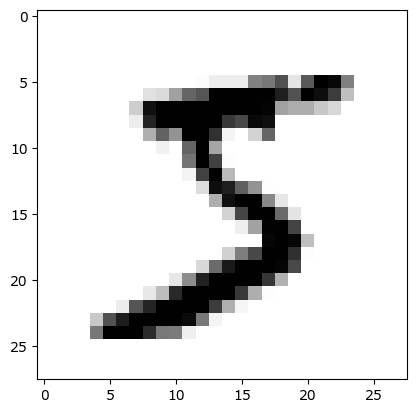

In [19]:
# lets plot the one image
plt.imshow(x_train[0], cmap='binary')
plt.show()

In [20]:
# parameters to train the model, 
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER='SGD'
METRICS=['accuracy']
model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
             metrics=METRICS)

In [21]:
# callback to stop the training if the model is not improving
# callback = keras.callbacks.EarlyStopping(patience=2,min_delta=0.1)

In [22]:
# training teh model
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5758 - accuracy: 0.8535 - val_loss: 1588.0413 - val_accuracy: 0.1018
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2712 - accuracy: 0.9227 - val_loss: 1801.4948 - val_accuracy: 0.1008
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2202 - accuracy: 0.9372 - val_loss: 1871.1466 - val_accuracy: 0.1020
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1866 - accuracy: 0.9466 - val_loss: 1958.6816 - val_accuracy: 0.1020
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1618 - accuracy: 0.9536 - val_loss: 2033.8768 - val_accuracy: 0.1020
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1423 - accuracy: 0.9592 - val_loss: 2073.6201 - val_accuracy: 0.1024
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1267 - accuracy: 0.9643 - val_loss: 2159

In [23]:
# lets test the model
y_actual = y_test[:3]
y_pred = model.predict(x_test[:3])
y_predicted = []
for i in y_pred:
    y_predicted.append(np.argmax(i))
print("Y_actual", y_actual, "Y_pred", y_predicted)

1/1 [==============================] - 0s 108ms/step
Y_actual [3 9 9] Y_pred [3, 9, 9]


In [24]:
# the output the model is mathed lets plot the img

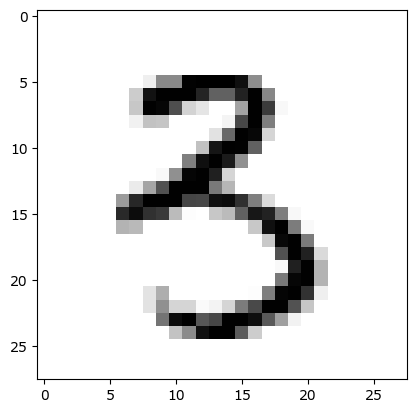

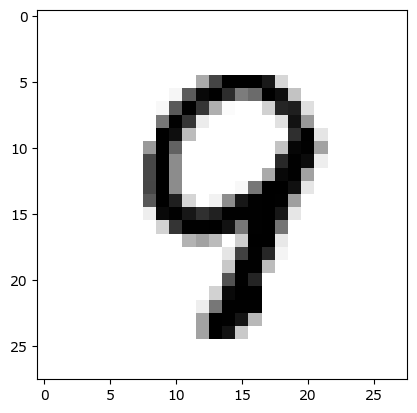

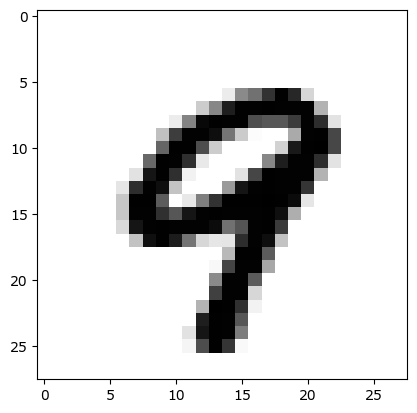

In [25]:
for i in x_test[:3]:
    plt.imshow(i, cmap='binary')
    plt.show()

In [26]:
# you can we verify the above images